['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Available matplotlib styles after seaborn install: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-

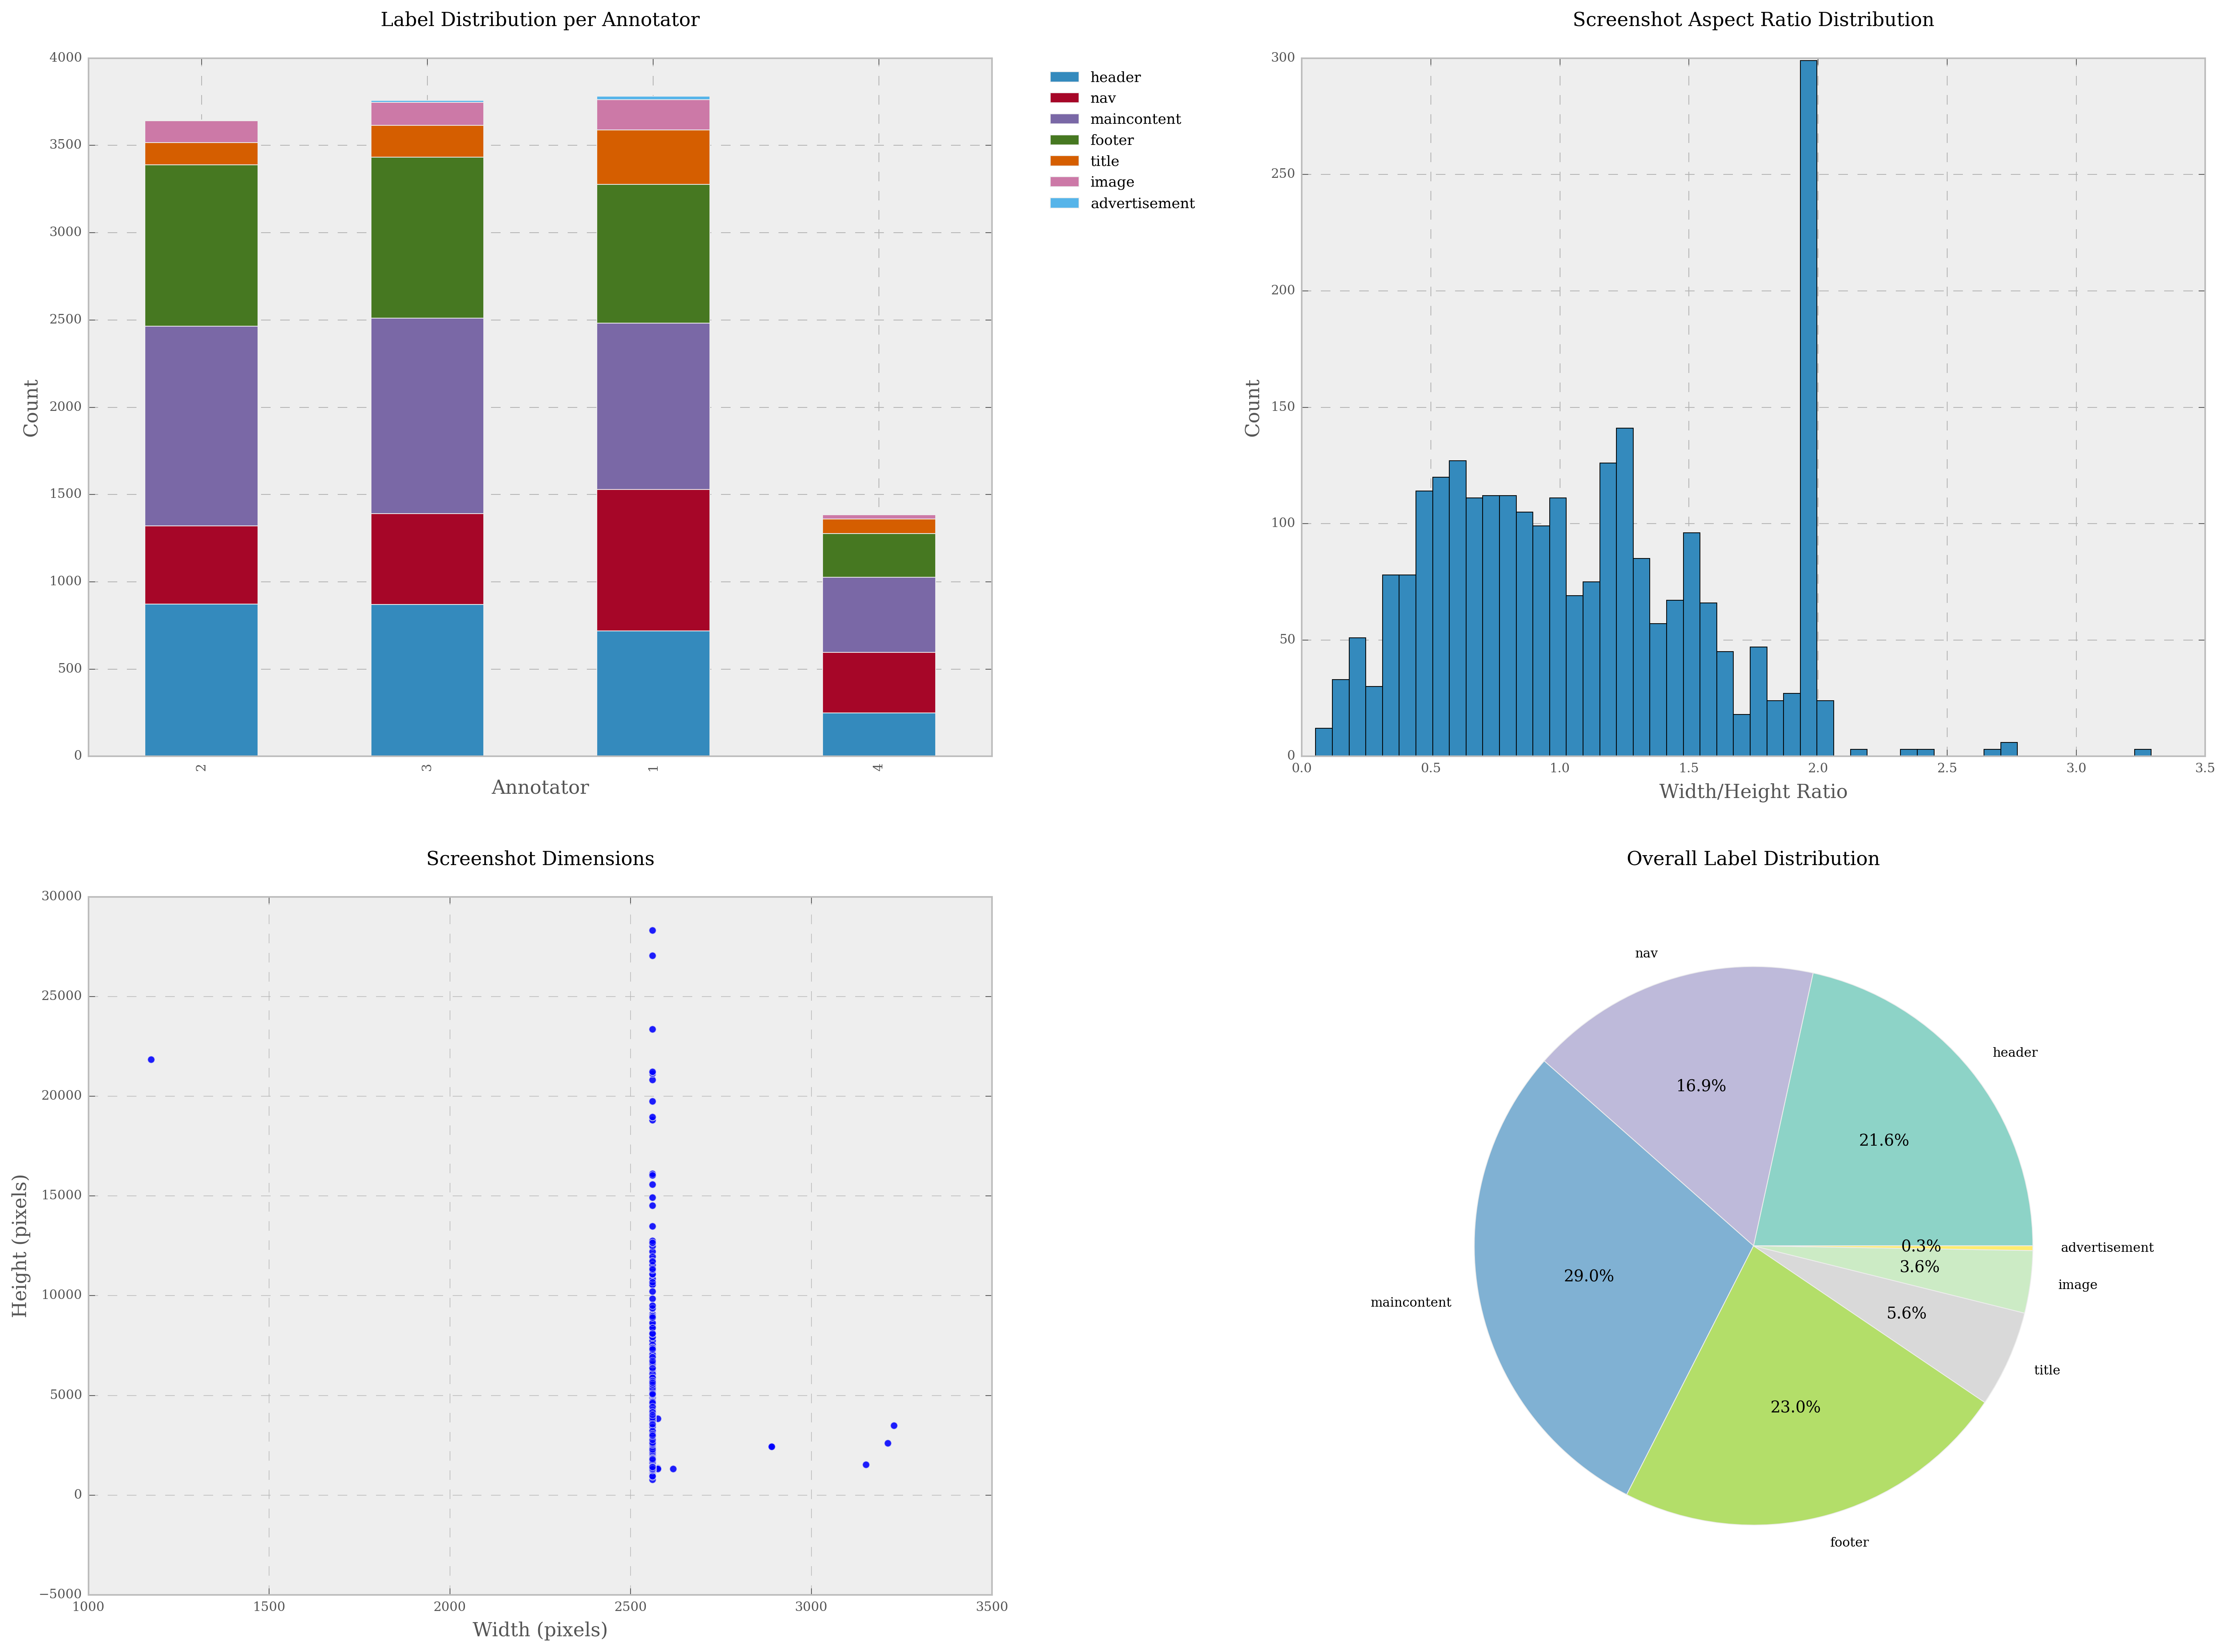

In [12]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
print(plt.style.available)
import seaborn as sns # Import seaborn to ensure it's installed
from PIL import Image
from collections import defaultdict
import numpy as np

# Install seaborn if it's not already installed (try-except to avoid errors if already installed)
try:
    import seaborn
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "seaborn"])
    import seaborn

# Check if seaborn style is now available
print(f"Available matplotlib styles after seaborn install: {plt.style.available}")

plt.style.use('bmh')

# Load annotations
with open('./data/IIS_data/annotations.json', 'r') as f:
    annotations = json.load(f)

# Extract annotator IDs
annotator_ids = set()
for item in annotations:
    if 'id' in item:
        annotator_num = item['id'].split('_annotator')[-1]
        annotator_ids.add(annotator_num)

print("Unique annotators found:", sorted(list(annotator_ids)))

# Initialize statistics containers
label_stats = defaultdict(lambda: defaultdict(int))
total_labels = defaultdict(int)
aspect_ratios = []
image_sizes = []

# Collect statistics per annotator
for item in annotations:
    annotator_num = item['id'].split('_annotator')[-1]

    # Count labels per annotator
    if 'annotation' in item:
        for ann in item['annotation']:
            if 'tagType' in ann:
                label_stats[annotator_num][ann['tagType']] += 1
                total_labels[ann['tagType']] += 1

    # Collect image dimensions
    if 'screenshot_size' in item:
        width = item['screenshot_size']['width']
        height = item['screenshot_size']['height']
        aspect_ratios.append(width/height)
        image_sizes.append((width, height))

# Print label distribution per annotator
print("\nLabel distribution per annotator:")
for annotator in sorted(label_stats.keys()):
    print(f"\nAnnotator {annotator}:")
    total = sum(label_stats[annotator].values())
    for label, count in sorted(label_stats[annotator].items()):
        percentage = (count/total) * 100
        print(f"{label}: {count} ({percentage:.1f}%)")

print("\nTotal label distribution:")
total = sum(total_labels.values())
for label, count in sorted(total_labels.items()):
    percentage = (count/total) * 100
    print(f"{label}: {count} ({percentage:.1f}%)")

# Create visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Label distribution plot
ax1 = plt.subplot(2, 2, 1)
df_labels = pd.DataFrame.from_dict(label_stats, orient='index')
df_labels.plot(kind='bar', stacked=True, ax=ax1)
plt.title('Label Distribution per Annotator', fontsize=12, pad=20)
plt.xlabel('Annotator')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Aspect ratio distribution
ax2 = plt.subplot(2, 2, 2)
plt.hist(aspect_ratios, bins=50, edgecolor='black')
plt.title('Screenshot Aspect Ratio Distribution', fontsize=12, pad=20)
plt.xlabel('Width/Height Ratio')
plt.ylabel('Count')

# 3. Image dimensions scatter plot
ax3 = plt.subplot(2, 2, 3)
widths, heights = zip(*image_sizes)
plt.scatter(widths, heights, alpha=0.5)
plt.title('Screenshot Dimensions', fontsize=12, pad=20)
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Total label distribution pie chart
ax4 = plt.subplot(2, 2, 4)
colors = plt.cm.Set3(np.linspace(0, 1, len(total_labels)))
plt.pie(total_labels.values(), labels=total_labels.keys(),
        autopct='%1.1f%%', colors=colors)
plt.title('Overall Label Distribution', fontsize=12, pad=20)

# Adjust layout to prevent overlapping
plt.tight_layout(pad=3.0)
plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Available matplotlib styles after seaborn install: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-

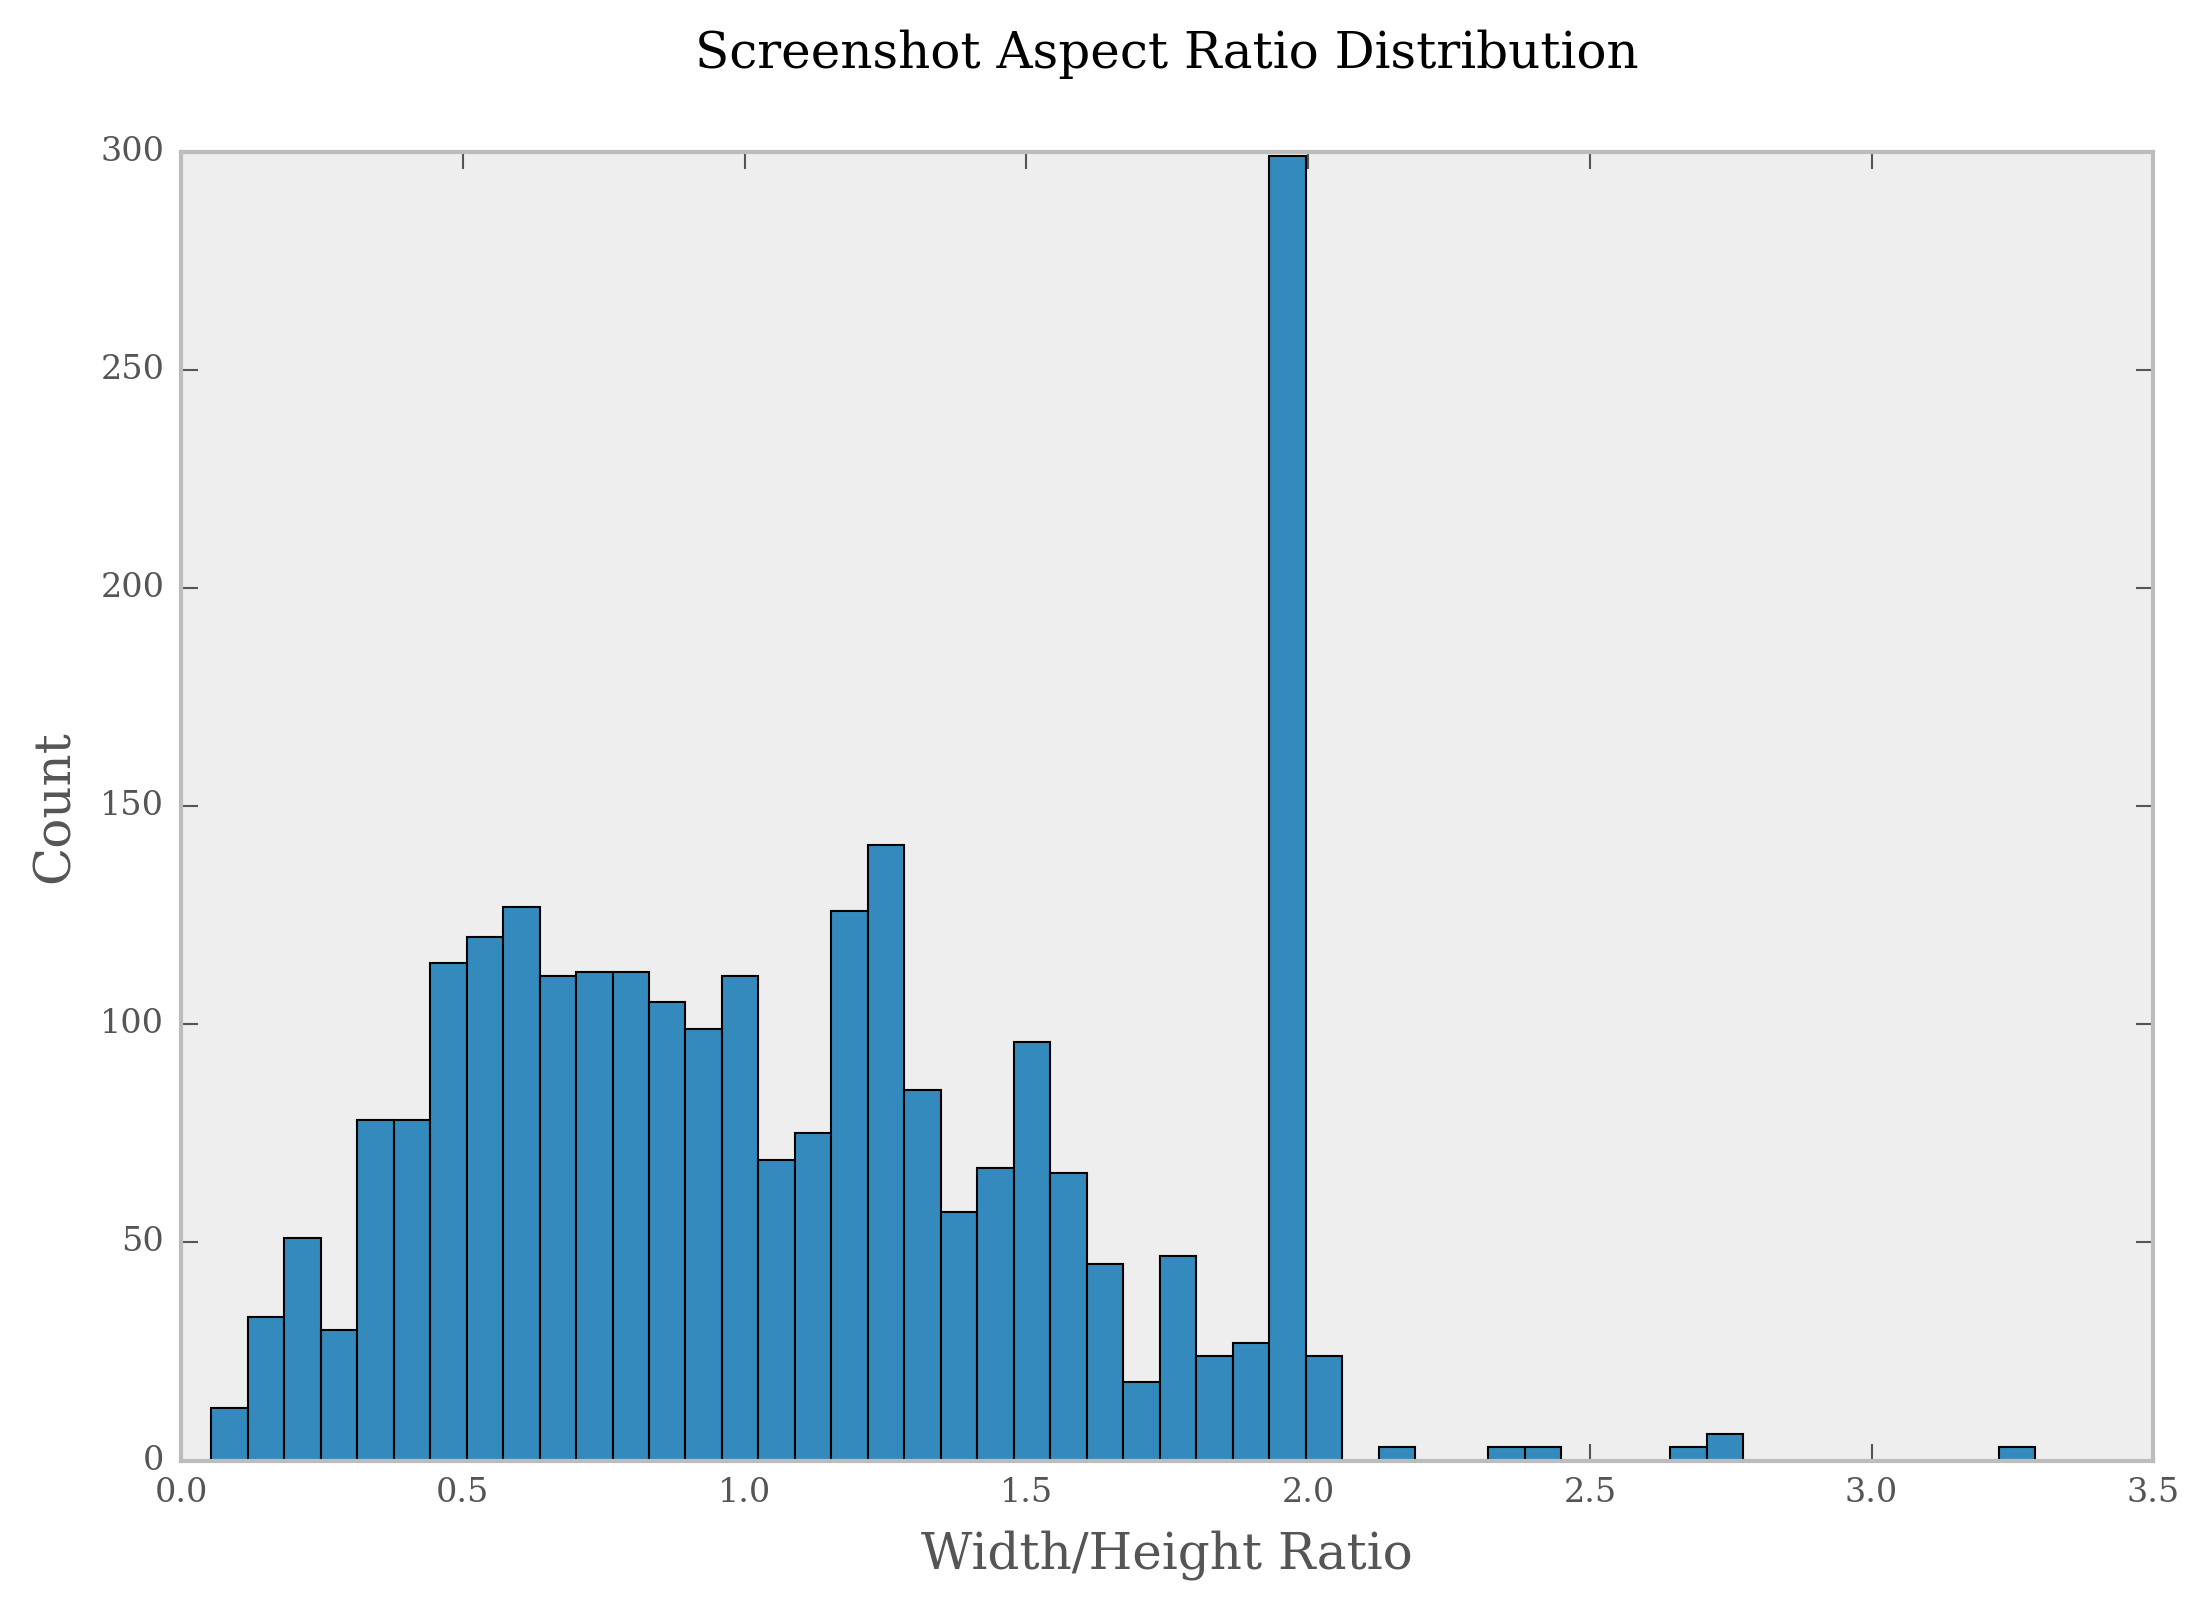

In [23]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
print(plt.style.available)
import seaborn as sns # Import seaborn to ensure it's installed
from PIL import Image
from collections import defaultdict
import numpy as np

# Install seaborn if it's not already installed (try-except to avoid errors if already installed)
try:
    import seaborn
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "seaborn"])
    import seaborn

# Check if seaborn style is now available
print(f"Available matplotlib styles after seaborn install: {plt.style.available}")

plt.style.use('bmh')

# Load annotations
with open('./data/IIS_data/annotations.json', 'r') as f:
    annotations = json.load(f)

# Extract annotator IDs
annotator_ids = set()
for item in annotations:
    if 'id' in item:
        annotator_num = item['id'].split('_annotator')[-1]
        annotator_ids.add(annotator_num)

print("Unique annotators found:", sorted(list(annotator_ids)))

# Initialize statistics containers
label_stats = defaultdict(lambda: defaultdict(int))
total_labels = defaultdict(int)
aspect_ratios = []
image_sizes = []

# Collect statistics per annotator
for item in annotations:
    annotator_num = item['id'].split('_annotator')[-1]

    # Count labels per annotator
    if 'annotation' in item:
        for ann in item['annotation']:
            if 'tagType' in ann:
                label_stats[annotator_num][ann['tagType']] += 1
                total_labels[ann['tagType']] += 1

    # Collect image dimensions
    if 'screenshot_size' in item:
        width = item['screenshot_size']['width']
        height = item['screenshot_size']['height']
        aspect_ratios.append(width/height)
        image_sizes.append((width, height))

# Print label distribution per annotator
print("\nLabel distribution per annotator:")
for annotator in sorted(label_stats.keys()):
    print(f"\nAnnotator {annotator}:")
    total = sum(label_stats[annotator].values())
    for label, count in sorted(label_stats[annotator].items()):
        percentage = (count/total) * 100
        print(f"{label}: {count} ({percentage:.1f}%)")

print("\nTotal label distribution:")
total = sum(total_labels.values())
for label, count in sorted(total_labels.items()):
    percentage = (count/total) * 100
    print(f"{label}: {count} ({percentage:.1f}%)")

# Create visualizations
fig = plt.figure(figsize=(8, 6)) # Adjust figure size for a single plot

# 2. Aspect ratio distribution - Plotting independently
ax2 = fig.add_subplot(1, 1, 1) # Create a single subplot
plt.hist(aspect_ratios, bins=50, edgecolor='black')
plt.title('Screenshot Aspect Ratio Distribution', fontsize=12, pad=20)
plt.xlabel('Width/Height Ratio')
plt.ylabel('Count')

# Remove horizontal grid lines
ax2.grid(axis='x', visible=False) # Remove vertical grid lines if present
ax2.grid(axis='y', visible=False) # This will remove horizontal grid lines


# Adjust layout to prevent overlapping (although not needed for single plot, good practice)
plt.tight_layout(pad=3.0)
plt.show()

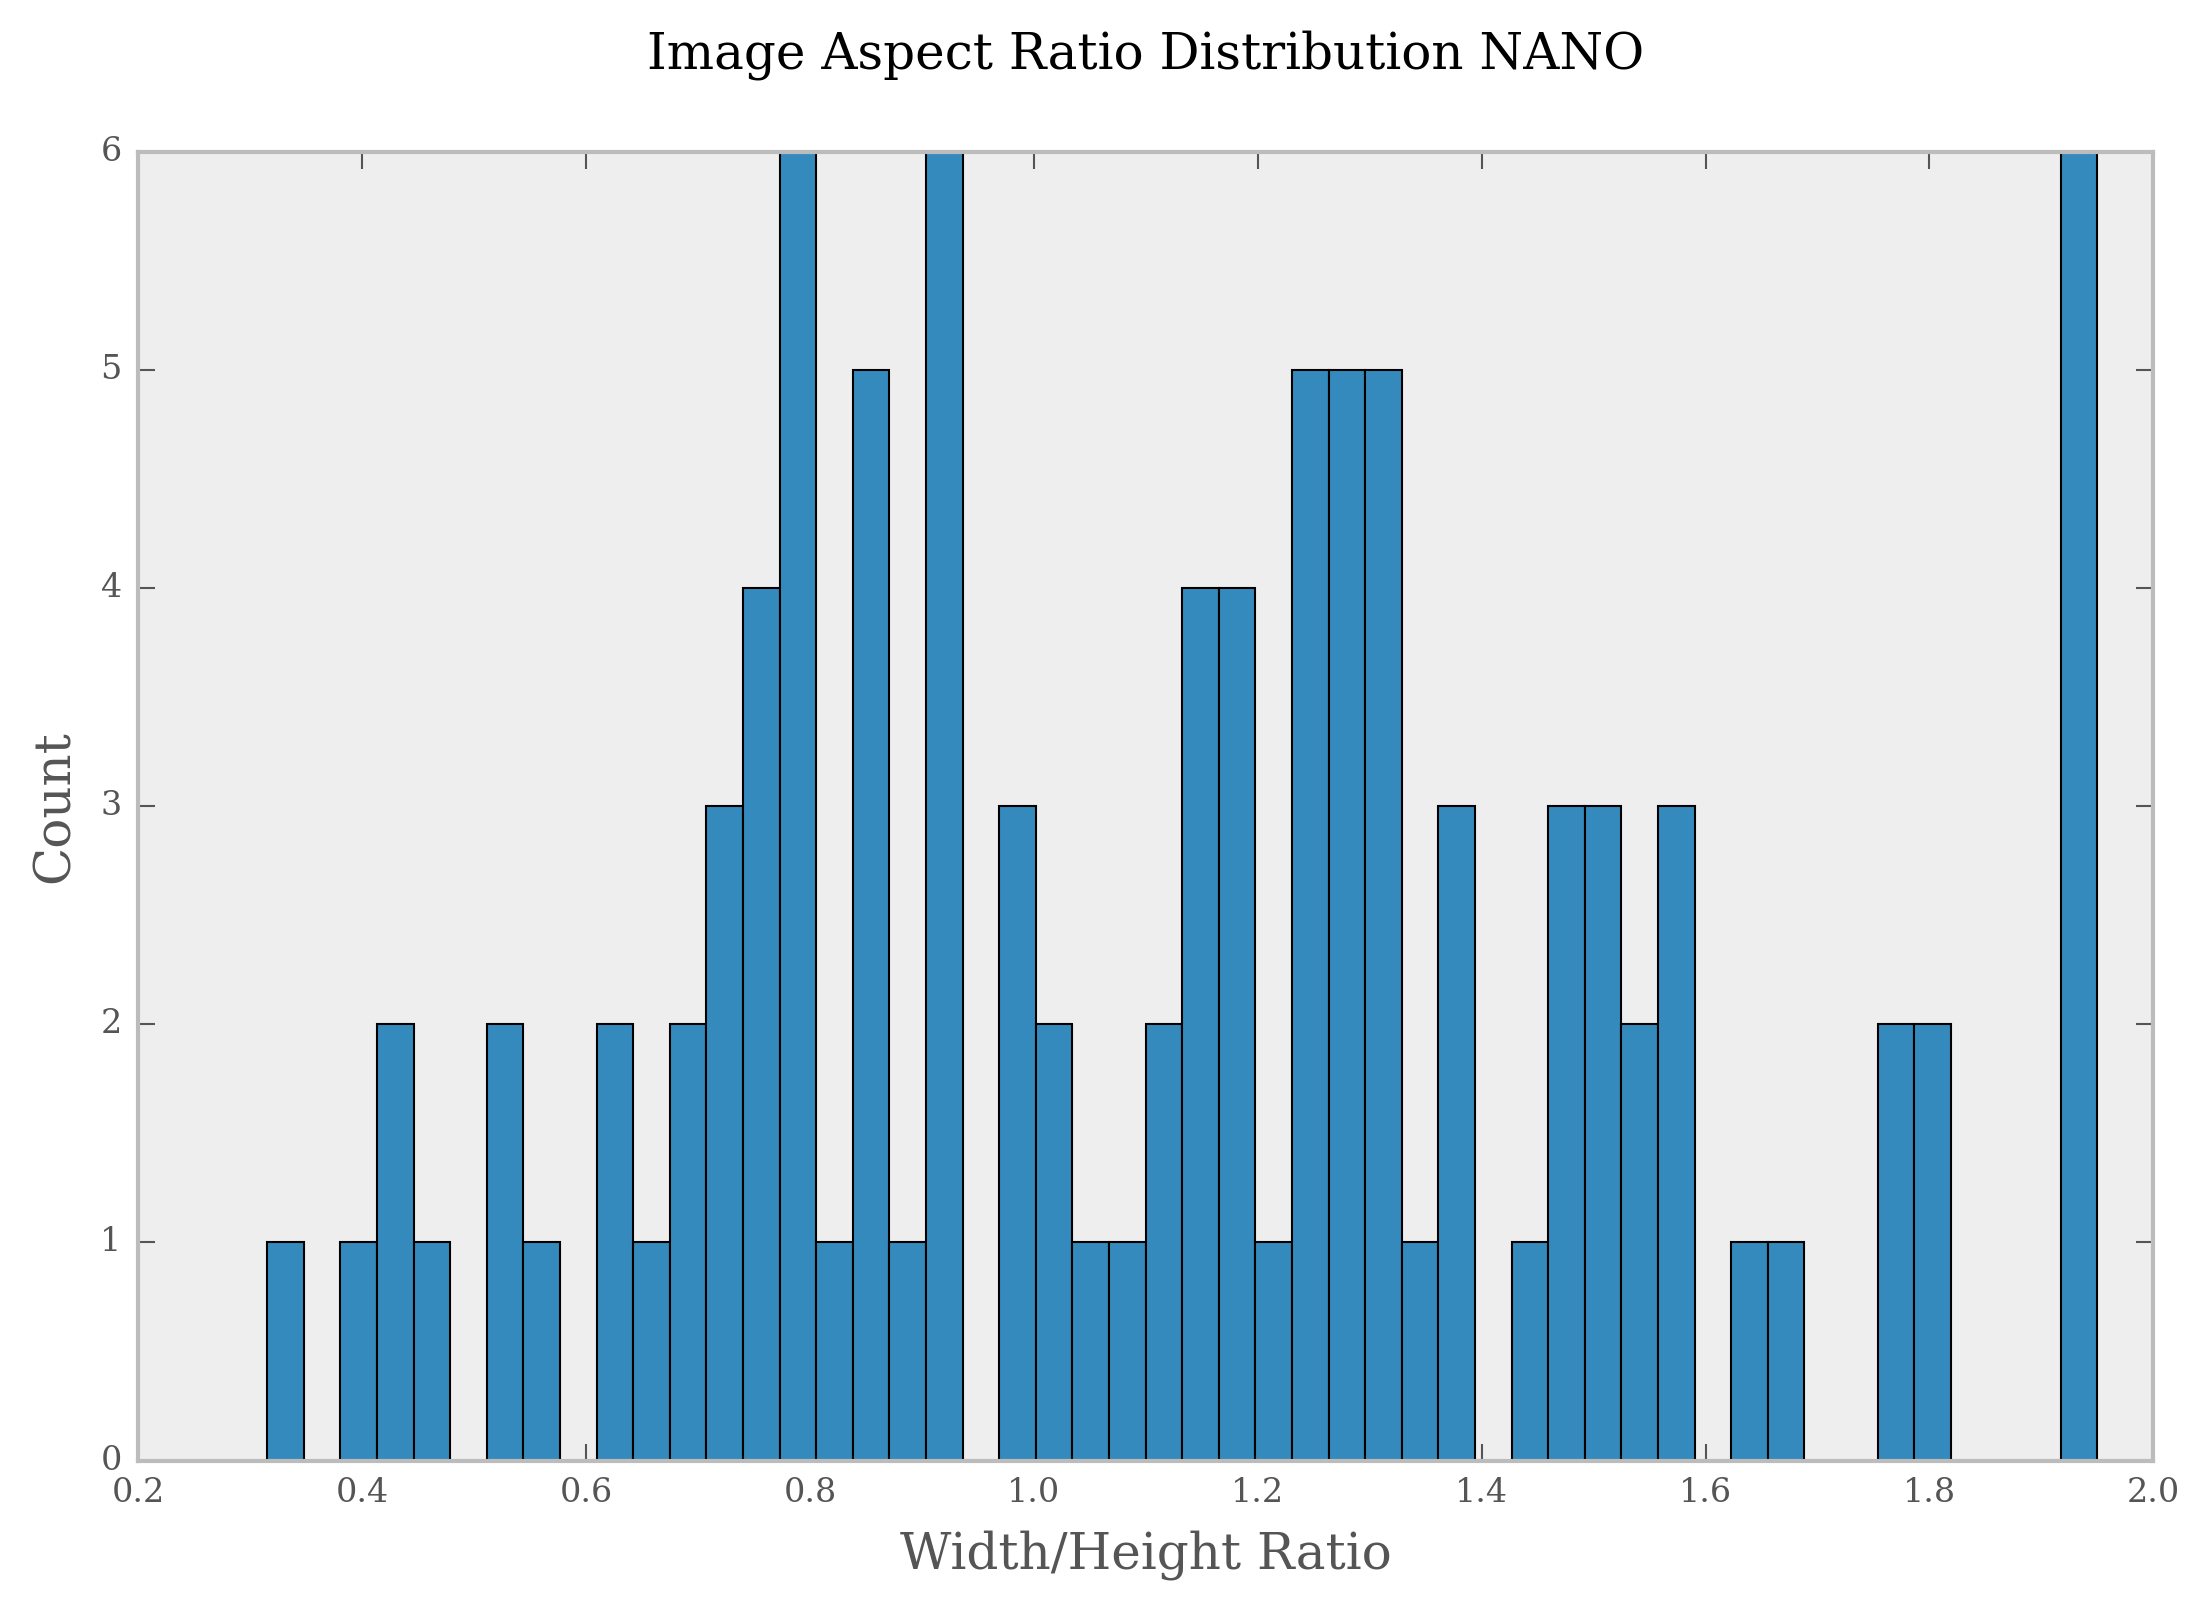


Total number of images: 100
Average aspect ratio: 1.13
Min aspect ratio: 0.32
Max aspect ratio: 1.95


In [46]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

# Define paths
train_images_path = '/home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/images/train'
val_images_path = '/home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/images/val'

# Initialize statistics containers
aspect_ratios = []
image_sizes = []

# Collect statistics from training images
for img_name in os.listdir(train_images_path):
    img_path = os.path.join(train_images_path, img_name)
    with Image.open(img_path) as img:
        width, height = img.size
        aspect_ratios.append(width/height)
        image_sizes.append((width, height))

# Collect statistics from validation images
for img_name in os.listdir(val_images_path):
    img_path = os.path.join(val_images_path, img_name)
    with Image.open(img_path) as img:
        width, height = img.size
        aspect_ratios.append(width/height)
        image_sizes.append((width, height))

# Create visualization
plt.style.use('bmh')
fig = plt.figure(figsize=(8, 6))

# Plot aspect ratio distribution
plt.hist(aspect_ratios, bins=50, edgecolor='black')
plt.title('Image Aspect Ratio Distribution NANO', fontsize=12, pad=20)
plt.xlabel('Width/Height Ratio')
plt.ylabel('Count')

# Remove grid lines
plt.gca().grid(False)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

# Print some statistics
print(f"\nTotal number of images: {len(aspect_ratios)}")
print(f"Average aspect ratio: {sum(aspect_ratios)/len(aspect_ratios):.2f}")
print(f"Min aspect ratio: {min(aspect_ratios):.2f}")
print(f"Max aspect ratio: {max(aspect_ratios):.2f}")

100%|██████████| 6792/6792 [00:00<00:00, 32530.21it/s]


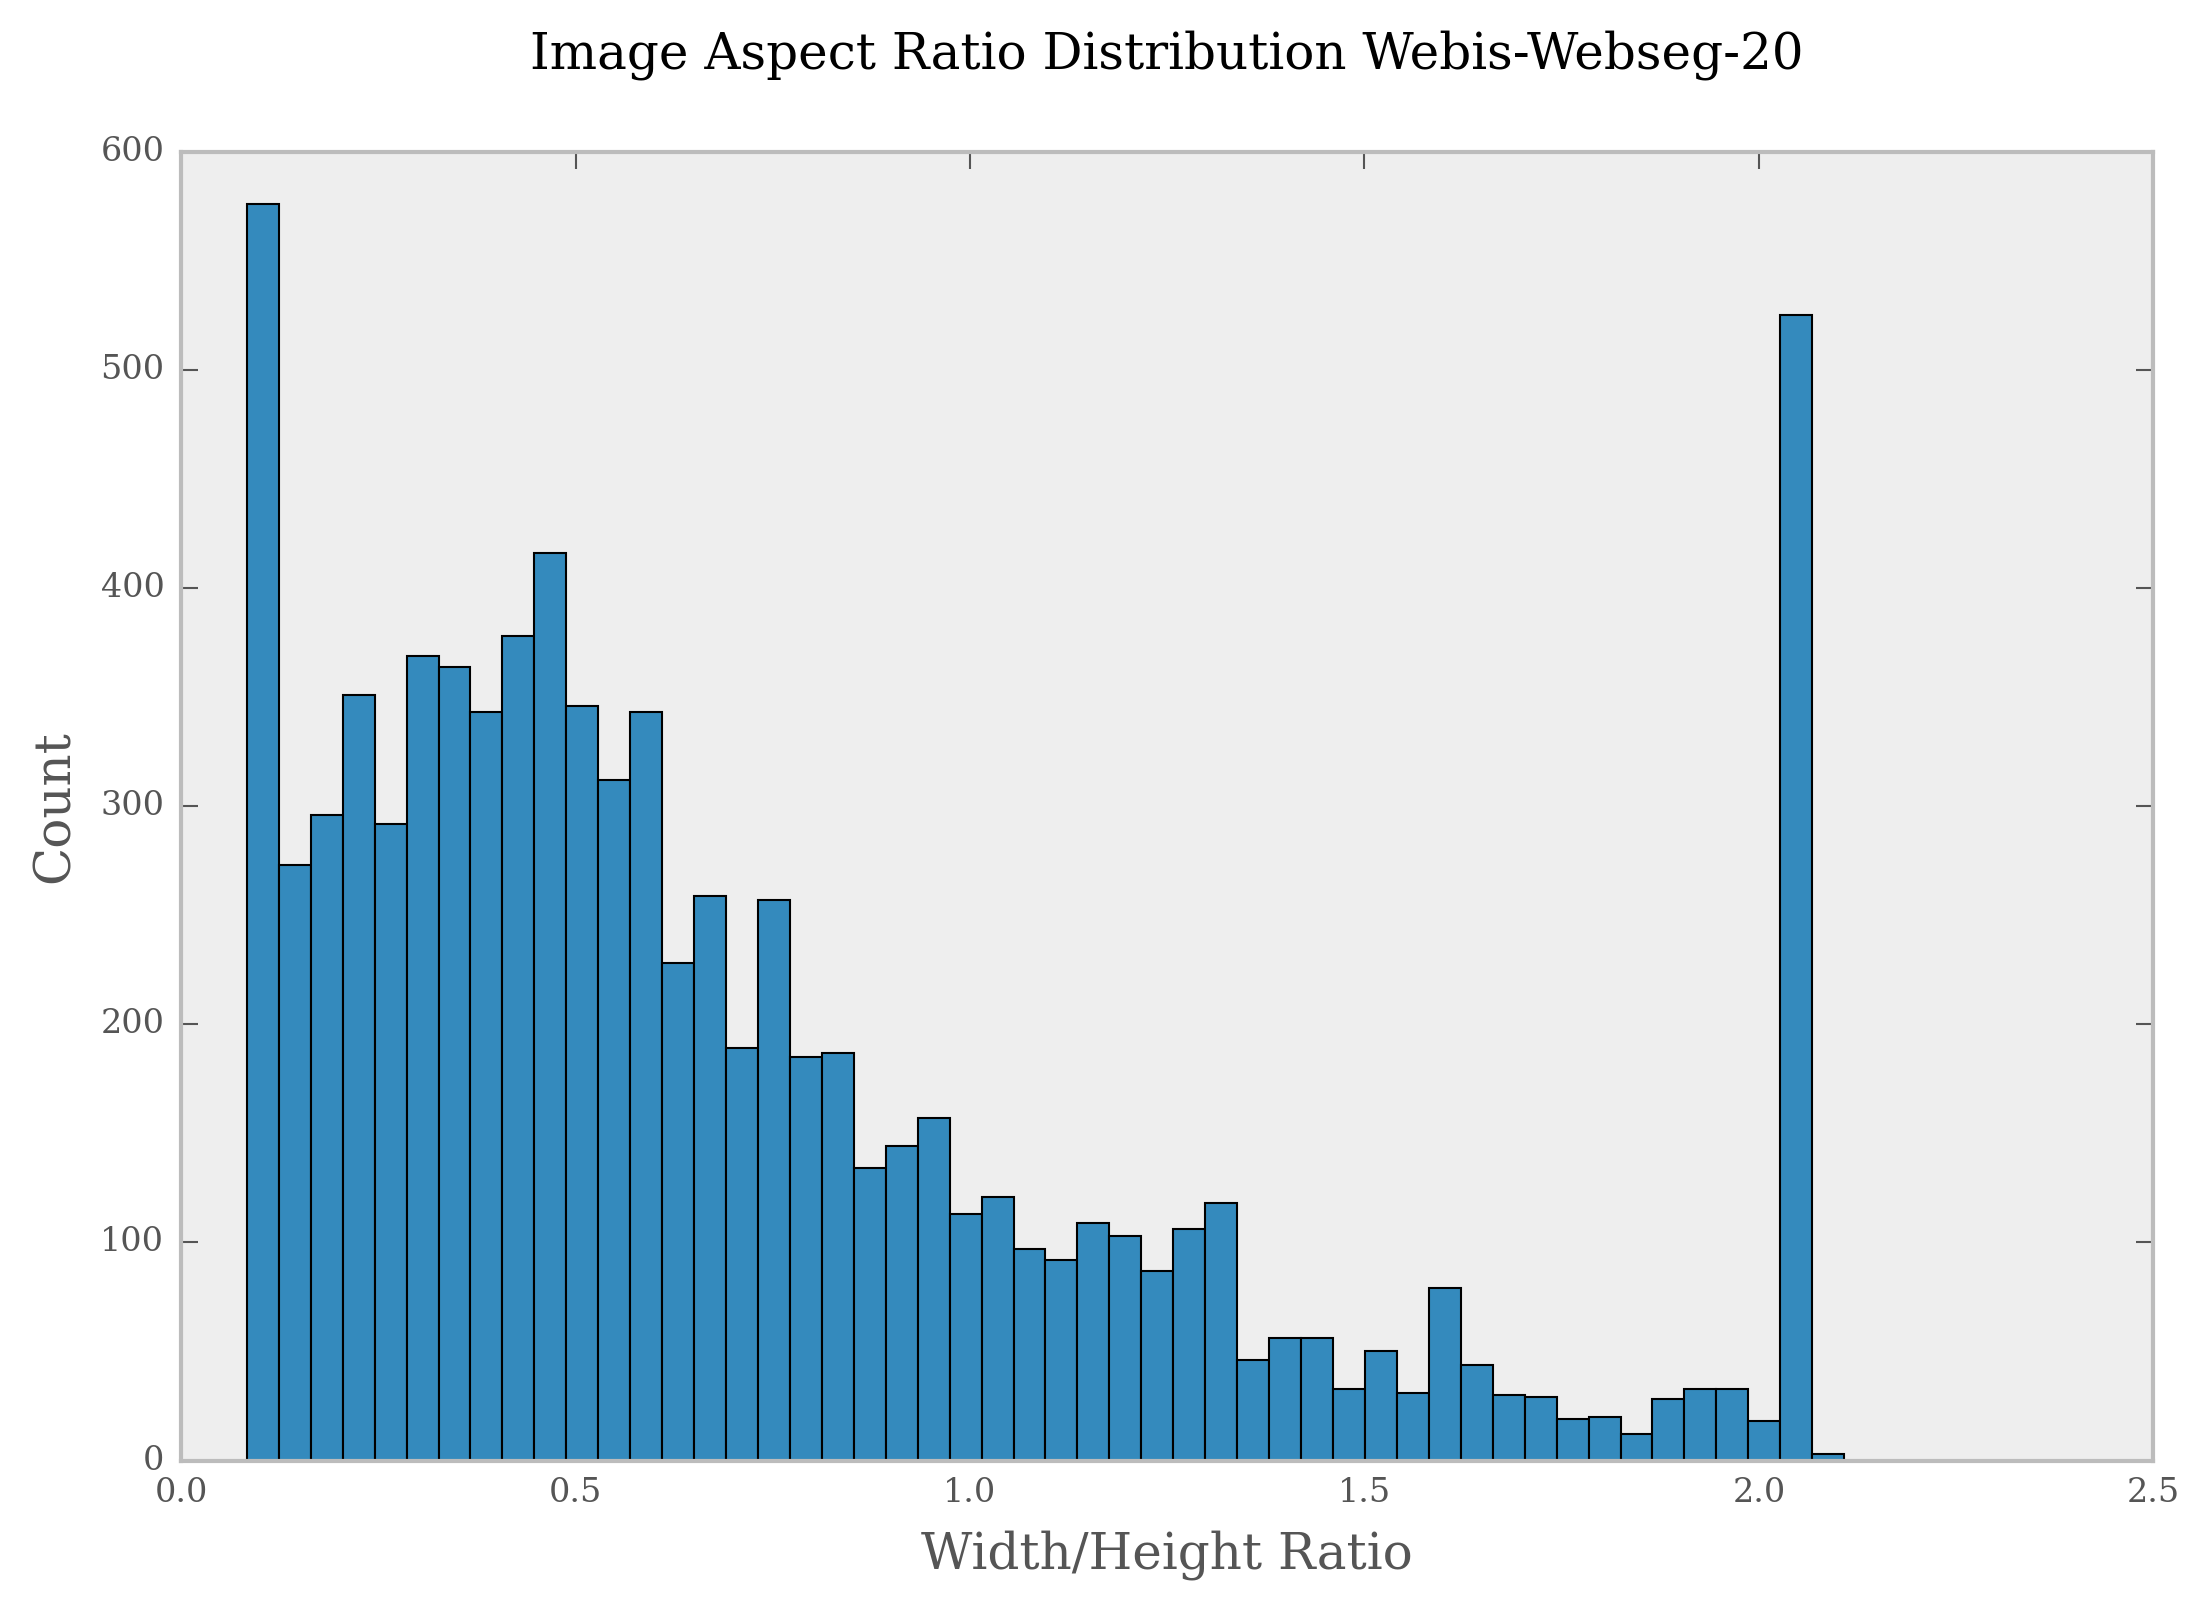


Total number of images: 8490
Average aspect ratio: 0.72
Min aspect ratio: 0.08
Max aspect ratio: 2.11


In [47]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict
from tqdm import tqdm

# Define paths
train_images_path = '/home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-full/images/train'
val_images_path = '/home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-full/images/val'

# Initialize statistics containers
aspect_ratios = []
image_sizes = []

# Collect statistics from training images
for img_name in tqdm(os.listdir(train_images_path)):
    img_path = os.path.join(train_images_path, img_name)
    with Image.open(img_path) as img:
        width, height = img.size
        aspect_ratios.append(width/height)
        image_sizes.append((width, height))

# Collect statistics from validation images
for img_name in os.listdir(val_images_path):
    img_path = os.path.join(val_images_path, img_name)
    with Image.open(img_path) as img:
        width, height = img.size
        aspect_ratios.append(width/height)
        image_sizes.append((width, height))

# Create visualization
plt.style.use('bmh')
fig = plt.figure(figsize=(8, 6))

# Plot aspect ratio distribution
plt.hist(aspect_ratios, bins=50, edgecolor='black')
plt.title('Image Aspect Ratio Distribution Webis-Webseg-20', fontsize=12, pad=20)
plt.xlabel('Width/Height Ratio')
plt.ylabel('Count')

# Remove grid lines
plt.gca().grid(False)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

# Print some statistics
print(f"\nTotal number of images: {len(aspect_ratios)}")
print(f"Average aspect ratio: {sum(aspect_ratios)/len(aspect_ratios):.2f}")
print(f"Min aspect ratio: {min(aspect_ratios):.2f}")
print(f"Max aspect ratio: {max(aspect_ratios):.2f}")

100%|██████████| 20/20 [00:01<00:00, 18.07it/s]


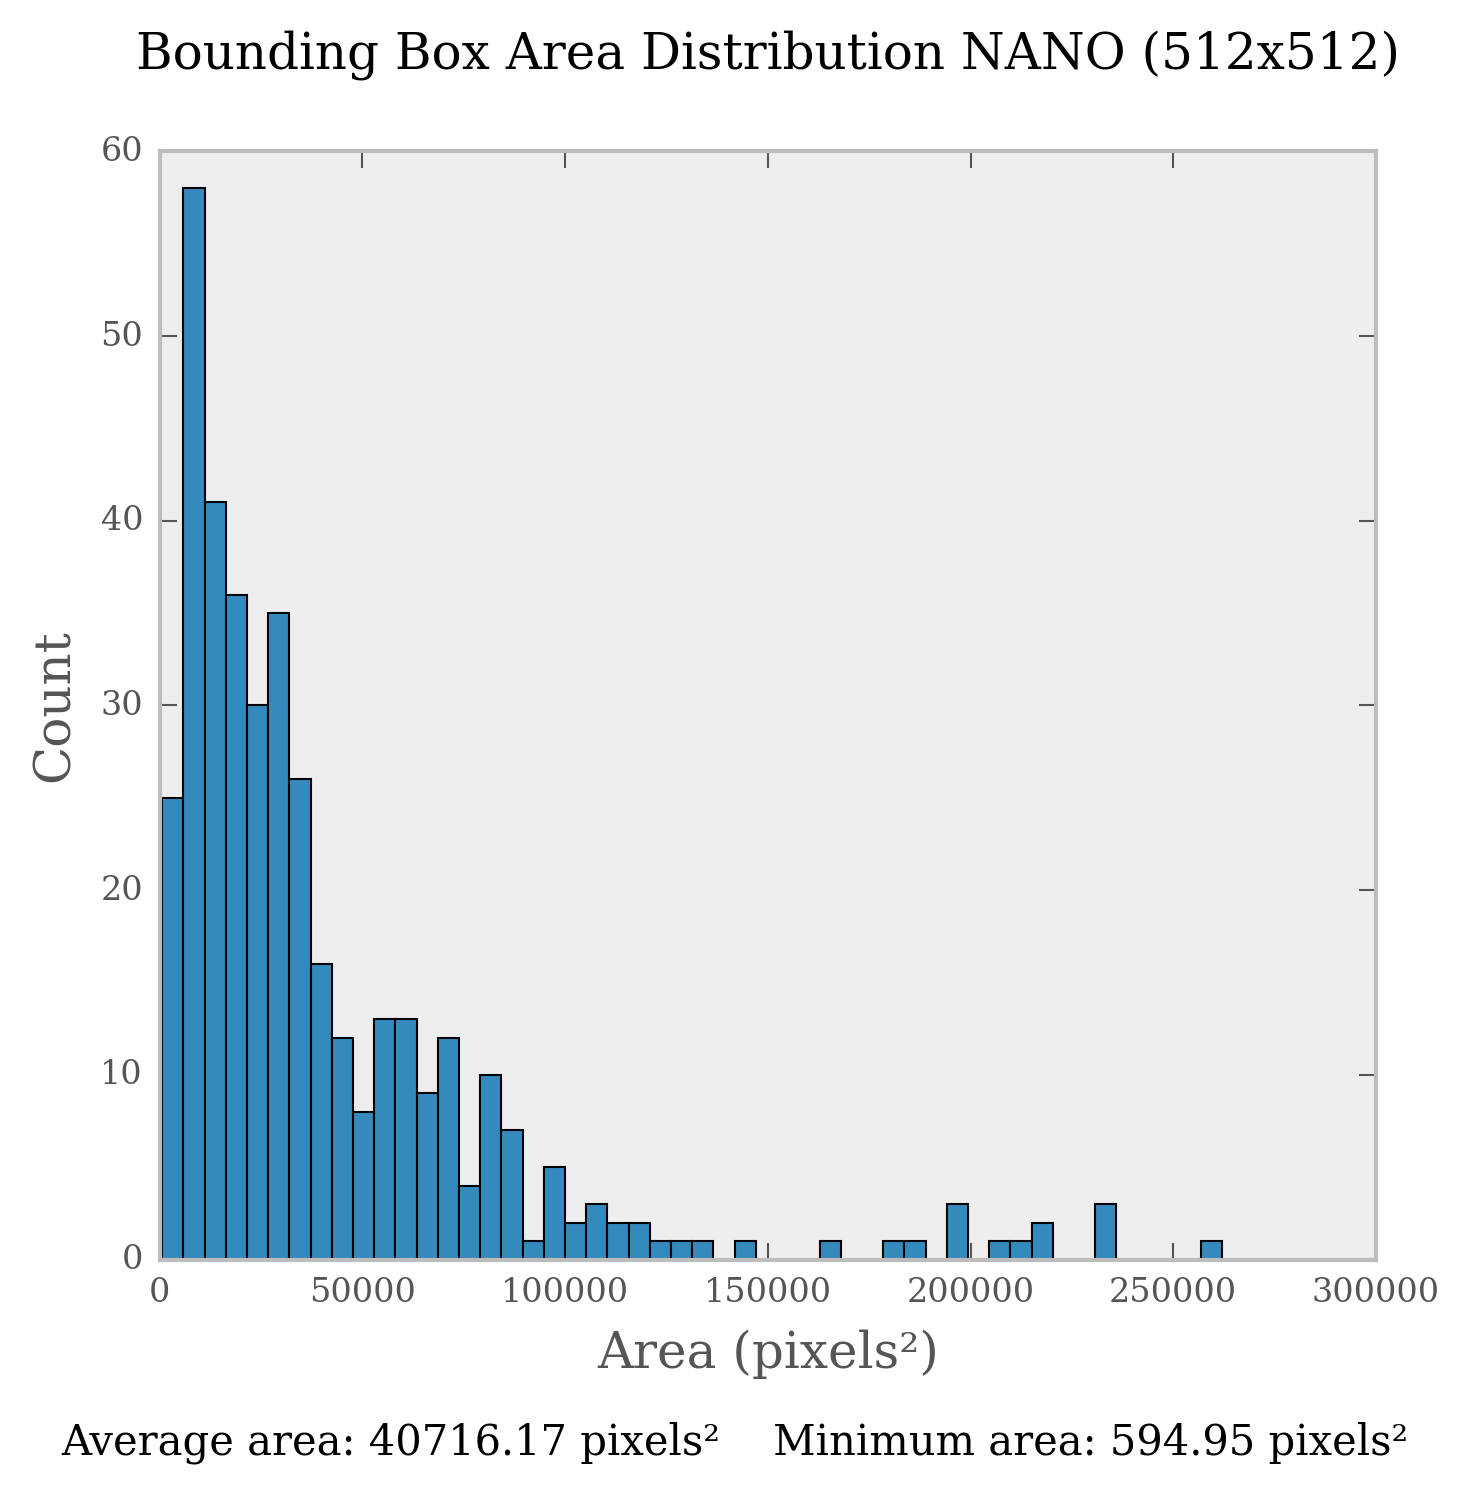

In [52]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm

# Define paths
train_images_path = '/home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/images/train'
val_images_path = '/home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/images/val'
train_labels_path = '/home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/train'
val_labels_path = '/home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/labels/val'

TARGET_SIZE = 512
bbox_areas = []

def process_labels(label_dir, images_dir):
    #use tqdm
    for label_file in tqdm(os.listdir(label_dir)):
        img_name = os.path.splitext(label_file)[0] + '.png'
        img_path = os.path.join(images_dir, img_name)
        
        # Read and resize image with cv2
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, (TARGET_SIZE, TARGET_SIZE))
        orig_height, orig_width = img.shape[:2]
        
        with open(os.path.join(label_dir, label_file), 'r') as f:
            for line in f:
                values = line.strip().split()
                if len(values) == 5:
                    _, _, _, width, height = map(float, values)
                    # Calculate area in 512x512 space
                    area = (width * TARGET_SIZE) * (height * TARGET_SIZE)
                    bbox_areas.append(area)

# Process both train and val sets
process_labels(train_labels_path, train_images_path)
process_labels(val_labels_path, val_images_path)

# Create visualization
plt.style.use('bmh')
fig = plt.figure(figsize=(5, 5))

# Plot bounding box area distribution
plt.hist(bbox_areas, bins=50, edgecolor='black')
plt.title('Bounding Box Area Distribution NANO (512x512)', fontsize=12, pad=20)
plt.xlabel('Area (pixels²)')
plt.ylabel('Count')

# Remove grid lines
plt.gca().grid(False)

# Calculate statistics
avg_area = np.mean(bbox_areas)
min_area = np.min(bbox_areas)

# Add statistics text at the bottom of the plot
plt.figtext(0.5, 0.02, f'Average area: {avg_area:.2f} pixels²    Minimum area: {min_area:.2f} pixels²', 
            fontsize=10, ha='center')

plt.tight_layout()
# Adjust bottom margin to make room for the text
plt.subplots_adjust(bottom=0.15)

plt.show()

100%|██████████| 1698/1698 [1:22:43<00:00,  2.92s/it]     


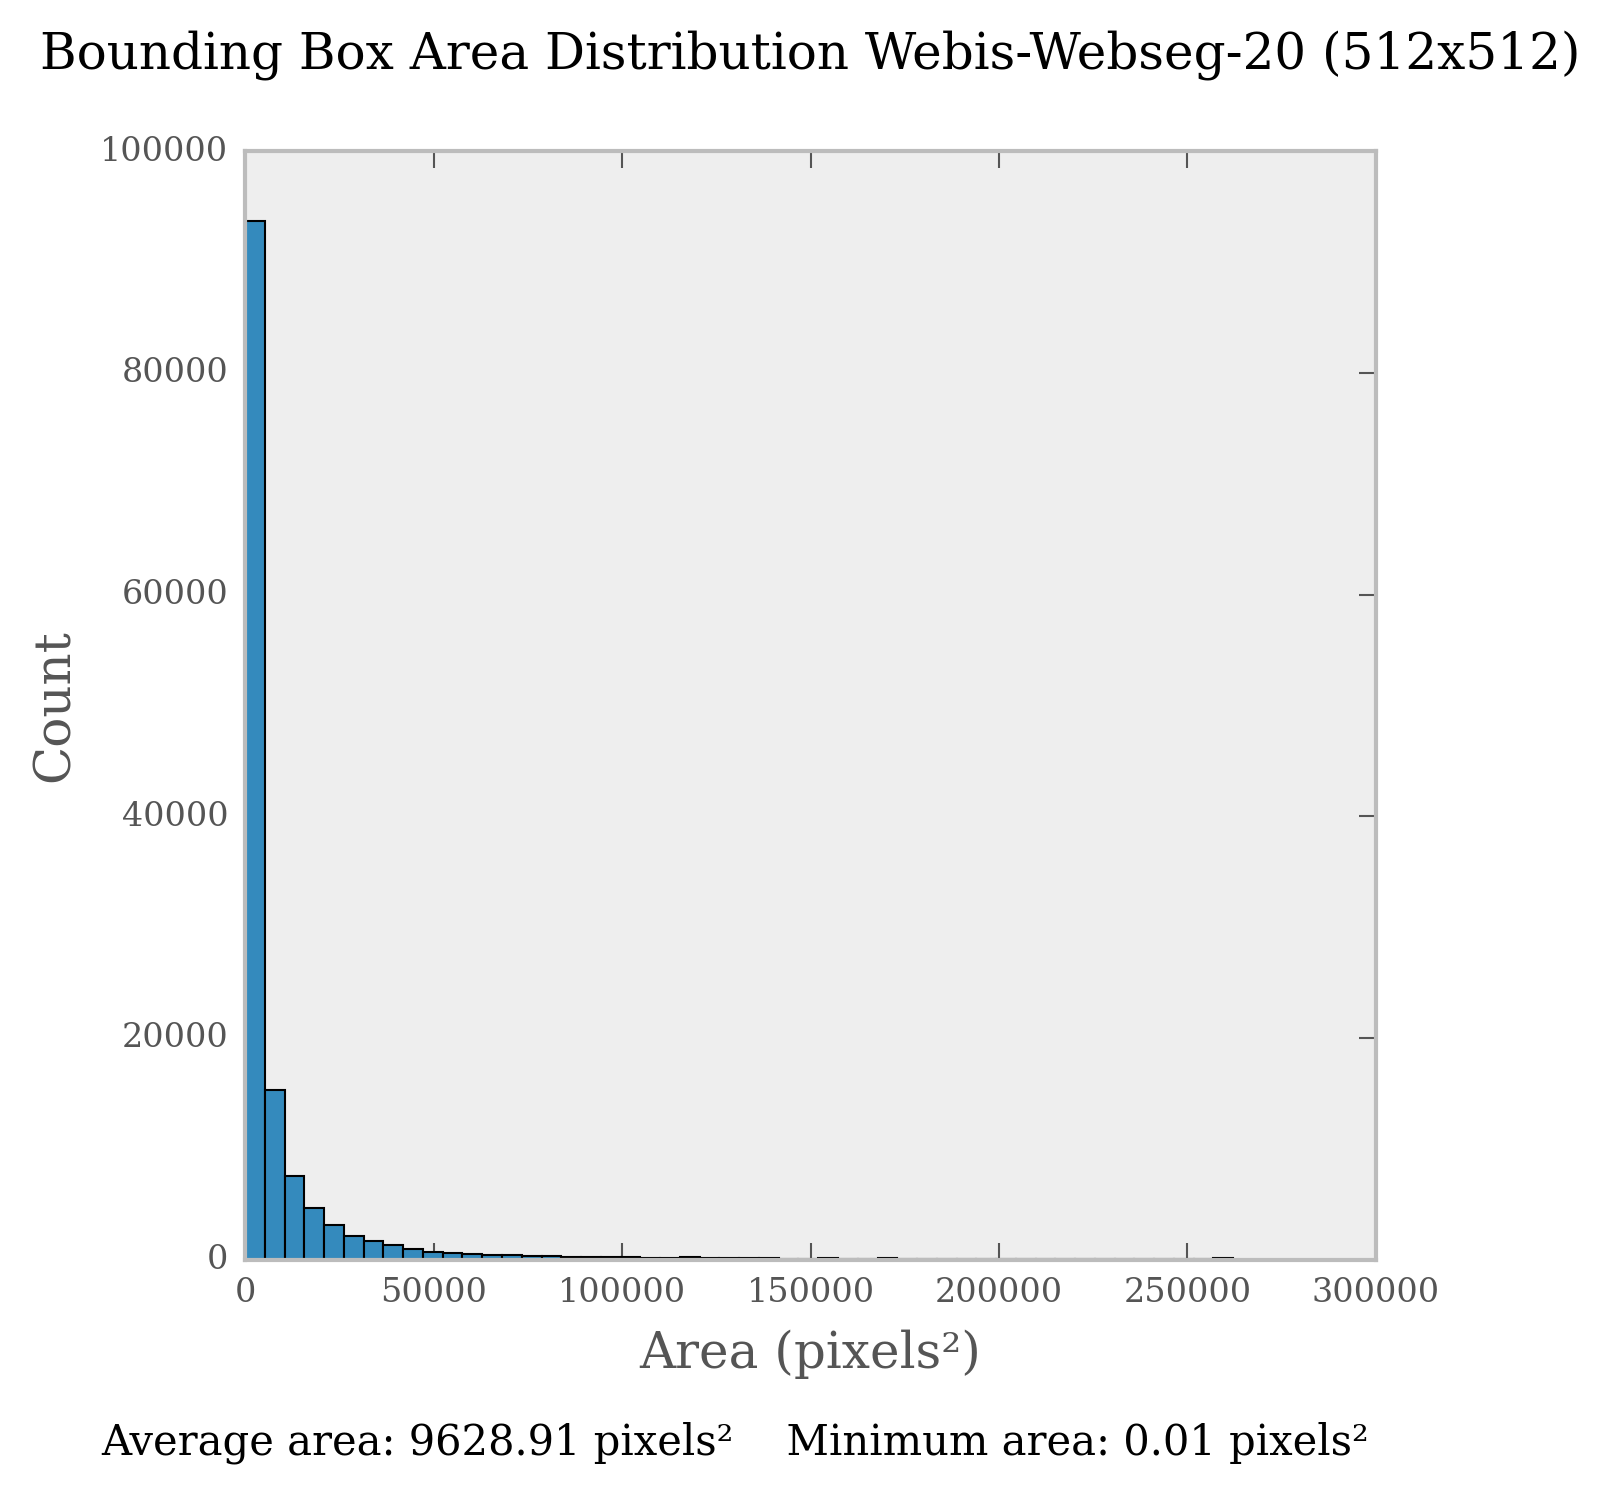

In [53]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm

# Define paths
train_images_path = '/home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-full/images/train'
val_images_path = '/home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-full/images/val'
train_labels_path = '/home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-full/labels/train'
val_labels_path = '/home/bruno/vt2-visual-webseg/data/webis-webseg-20-yolo-full/labels/val'

TARGET_SIZE = 512
bbox_areas = []

def process_labels(label_dir, images_dir):
    #use tqdm
    for label_file in tqdm(os.listdir(label_dir)):
        img_name = os.path.splitext(label_file)[0] + '.png'
        img_path = os.path.join(images_dir, img_name)
        
        # Read and resize image with cv2
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, (TARGET_SIZE, TARGET_SIZE))
        orig_height, orig_width = img.shape[:2]
        
        with open(os.path.join(label_dir, label_file), 'r') as f:
            for line in f:
                values = line.strip().split()
                if len(values) == 5:
                    _, _, _, width, height = map(float, values)
                    # Calculate area in 512x512 space
                    area = (width * TARGET_SIZE) * (height * TARGET_SIZE)
                    bbox_areas.append(area)

# Process both train and val sets
process_labels(train_labels_path, train_images_path)
process_labels(val_labels_path, val_images_path)

# Create visualization
plt.style.use('bmh')
fig = plt.figure(figsize=(5, 5))

# Plot bounding box area distribution
plt.hist(bbox_areas, bins=50, edgecolor='black')
plt.title('Bounding Box Area Distribution Webis-Webseg-20 (512x512)', fontsize=12, pad=20)
plt.xlabel('Area (pixels²)')
plt.ylabel('Count')

# Remove grid lines
plt.gca().grid(False)

# Calculate statistics
avg_area = np.mean(bbox_areas)
min_area = np.min(bbox_areas)

# Add statistics text at the bottom of the plot
plt.figtext(0.5, 0.02, f'Average area: {avg_area:.2f} pixels²    Minimum area: {min_area:.2f} pixels²', 
            fontsize=10, ha='center')

plt.tight_layout()
# Adjust bottom margin to make room for the text
plt.subplots_adjust(bottom=0.15)

plt.show()

In [ ]:
/home/bruno/vt2-visual-webseg/data/IIS_data_yolo_annotator_2_nano/images/train/66ffde79306dfe2088fda033.png

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 13.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
import json
import shutil
from pathlib import Path
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

class YOLODatasetConverter:
    def __init__(self, 
                 annotations_path='./data/IIS_data/annotations.json',
                 screenshots_dir='./data/IIS_data/screenshots',
                 output_dir='./data/yolo_dataset',
                 annotator_id=2,  # Default to annotator 2
                 num_images=1000,  # Limit number of images
                 val_split=0.2):
        
        self.annotations_path = Path(annotations_path)
        self.screenshots_dir = Path(screenshots_dir)
        self.output_dir = Path(output_dir)
        self.annotator_id = str(annotator_id)
        self.num_images = num_images
        self.val_split = val_split
        
        # Class mapping for segment types
        self.class_mapping = {
            'header': 0,
            'footer': 1,
            'nav': 2,
            'maincontent': 3,
            'title': 4
        }
        
    def setup_directories(self):
        """Create necessary directories for YOLO dataset"""
        for split in ['train', 'val']:
            (self.output_dir / 'images' / split).mkdir(parents=True, exist_ok=True)
            (self.output_dir / 'labels' / split).mkdir(parents=True, exist_ok=True)
            
    def load_annotations(self):
        """Load and filter annotations for specific annotator"""
        with open(self.annotations_path, 'r') as f:
            annotations = json.load(f)
        
        # Filter for specific annotator
        filtered_annotations = [
            ann for ann in annotations 
            if f'_annotator{self.annotator_id}' in ann['id']
        ]
        
        # Limit number of images if specified
        if self.num_images:
            filtered_annotations = filtered_annotations[:self.num_images]
            
        return filtered_annotations
    
    def polygon_to_yolo(self, polygon, img_width, img_height):
        """Convert polygon coordinates to YOLO format (x_center, y_center, width, height)"""
        x_coords = [p[0] for p in polygon]
        y_coords = [p[1] for p in polygon]
        
        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)
        
        # Convert to YOLO format
        x_center = ((x_min + x_max) / 2) / img_width
        y_center = ((y_min + y_max) / 2) / img_height
        width = (x_max - x_min) / img_width
        height = (y_max - y_min) / img_height
        
        return [x_center, y_center, width, height]
    
    def convert_annotations(self, annotation_item, img_width, img_height):
        """Convert all polygons in an annotation to YOLO format"""
        yolo_annotations = []
        
        for ann in annotation_item['annotation']:
            if 'tagType' in ann and ann['tagType'] in self.class_mapping:
                class_id = self.class_mapping[ann['tagType']]
                bbox = self.polygon_to_yolo(ann['polygon'], img_width, img_height)
                yolo_annotations.append([class_id] + bbox)
                
        return yolo_annotations
    
    def create_dataset(self):
        """Create YOLO dataset"""
        self.setup_directories()
        annotations = self.load_annotations()
        
        # Split into train and validation
        train_anns, val_anns = train_test_split(
            annotations, 
            test_size=self.val_split, 
            random_state=42
        )
        
        # Process both splits
        for split_name, split_anns in [('train', train_anns), ('val', val_anns)]:
            for ann in tqdm(split_anns, desc=f'Processing {split_name} split'):
                # Get image ID from annotation ID
                img_id = ann['id'].split('_annotator')[0]
                img_path = self.screenshots_dir / f'{img_id}.png'
                
                if not img_path.exists():
                    continue
                
                # Get image dimensions
                with Image.open(img_path) as img:
                    img_width, img_height = img.size
                
                # Convert annotations
                yolo_anns = self.convert_annotations(ann, img_width, img_height)
                
                # Save image
                shutil.copy(
                    img_path, 
                    self.output_dir / 'images' / split_name / f'{img_id}.png'
                )
                
                # Save labels
                label_path = self.output_dir / 'labels' / split_name / f'{img_id}.txt'
                with open(label_path, 'w') as f:
                    for ann in yolo_anns:
                        f.write(' '.join(map(str, ann)) + '\n')
        
        # Create dataset.yaml
        self.create_yaml()
        
    def create_yaml(self):
        """Create YOLO dataset.yaml file"""
        yaml_content = f"""
path: {self.output_dir.absolute()}
train: images/train
val: images/val

names:
  0: header
  1: footer
  2: nav
  3: maincontent
  4: title
"""
        with open(self.output_dir / 'dataset.yaml', 'w') as f:
            f.write(yaml_content.strip())

# Usage example
if __name__ == "__main__":
    # For single annotator
    converter = YOLODatasetConverter(
        annotator_id=2,  # Choose annotator (1-4)
        num_images=100,  # Limit number of images
        output_dir='./data/IIS_data_yolo_annotator_2_nano'  # Specify output directory
    )
    converter.create_dataset()
    
    """# For all annotators (will create separate datasets)
    for annotator_id in range(1, 5):
        converter = YOLODatasetConverter(
            annotator_id=annotator_id,
            num_images=1000,
            output_dir=f'./data/yolo_dataset_annotator{annotator_id}'
        )
        converter.create_dataset()"""

Processing val split: 100%|██████████| 20/20 [00:00<00:00, 266.80it/s]


In [3]:
converter = YOLODatasetConverter(
    annotator_id=2,  # Choose annotator 1-4
    num_images=1000,  # Limit to 1000 images
    output_dir='./data/IIS_data_yolo_annotator_2_small'
)
converter.create_dataset()

Processing val split: 100%|██████████| 171/171 [00:02<00:00, 75.38it/s] 
